# Introduction
This dataset  comprises 100,000 observations of space captured by the Sloan Digital Sky Survey (SDSS). Each observation is characterized by 17 feature columns and a class column, which categorizes it as a star, galaxy, or quasar. The primary objective of this project was to utilize this data to build and evaluate machine learning models capable of classifying these cosmic objects based on their spectral characteristics.

The scope of the project encompassed the following steps:
- Data exploration and understanding the distribution of classes.
- Preprocessing the data, including splitting and scaling.
- Training various machine learning models, including Random Forest, SVM, KNN, and a Neural Network.
- Evaluating the performance of each model and comparing their accuracies.
- Visualizing the distribution of cosmic object classes in the dataset.

Link to to the dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the CSV file
data = pd.read_csv('star_classification.csv')

# Display the first few rows of the dataset
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


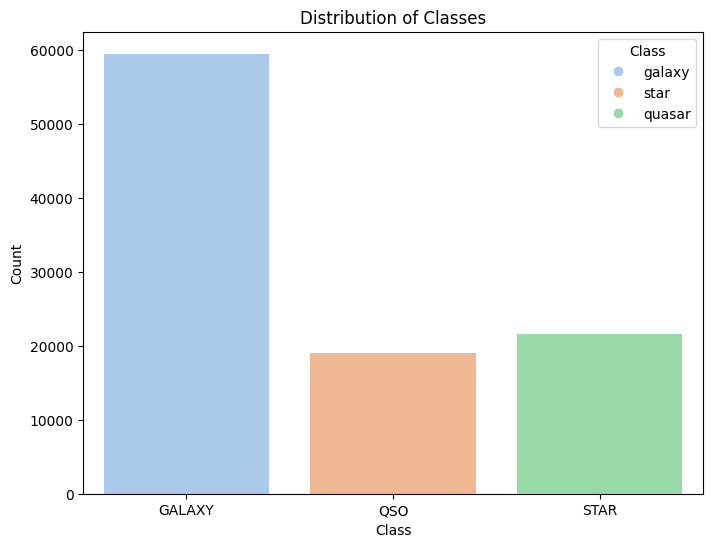

In [7]:
# Correctly plotting the distribution of classes with appropriate labels and legend
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='class', data=data, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=0)

# Get the unique colors of the bars
colors = [patch.get_facecolor() for patch in ax.patches[:3]]

# Create legend handles
handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='') for color in colors]

ax.legend(handles=handles, title='Class', labels=['galaxy', 'star', 'quasar'])
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# Drop unnecessary columns
data.drop(columns=['obj_ID', 'spec_obj_ID'], inplace=True, errors='ignore')

# Encode the target variable
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Split data into features and target
X = data.drop('class', axis=1)
y = data['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((80000, 15), (20000, 15))

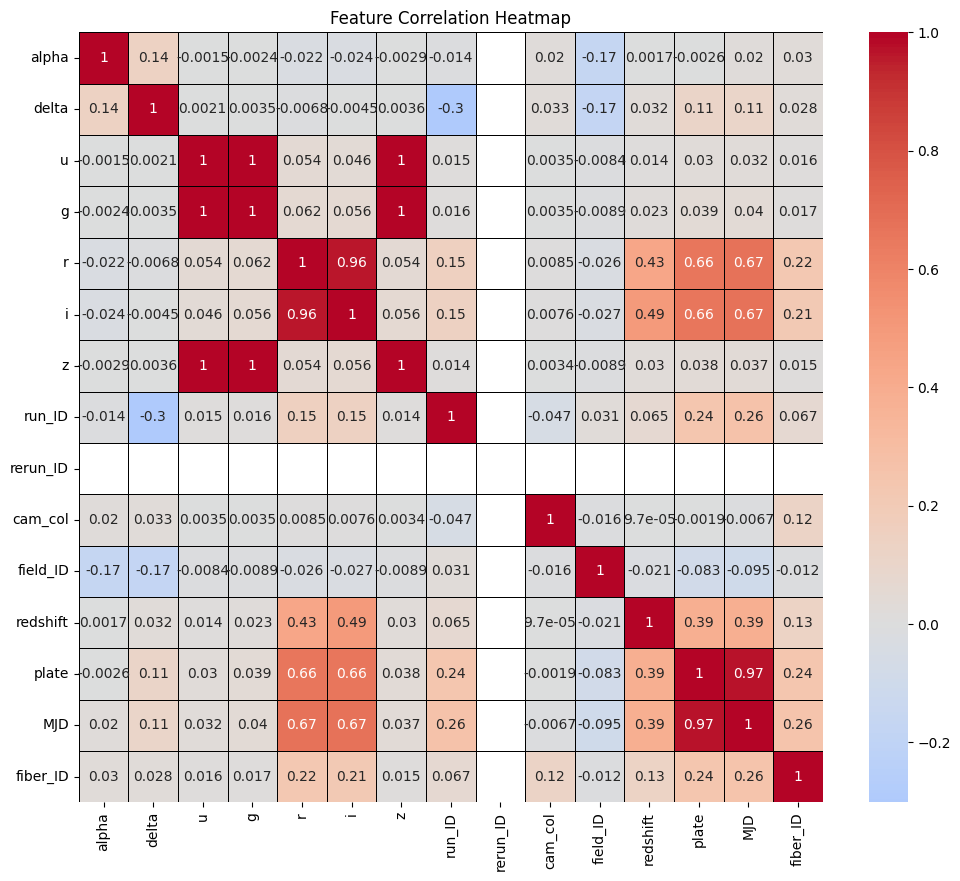

In [10]:
# Compute the correlation matrix
corr = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the models
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
lr_preds = lr.predict(X_test)
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)
svm_preds = svm.predict(X_test)

# Calculate accuracies
lr_acc = accuracy_score(y_test, lr_preds)
dt_acc = accuracy_score(y_test, dt_preds)
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

lr_acc, dt_acc, rf_acc, svm_acc

(0.95525, 0.9631, 0.9767, 0.95935)

In [ ]:
#!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, nn_acc = model.evaluate(X_test, y_test, verbose=0)

nn_acc

Epoch 1/10
2000/2000 [==============================] - 11s 4ms/step - loss: 0.2989 - accuracy: 0.8996 - val_loss: 0.1618 - val_accuracy: 0.9481
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1709 - accuracy: 0.9469 - val_loss: 0.1435 - val_accuracy: 0.9544
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1412 - accuracy: 0.9552 - val_loss: 0.1377 - val_accuracy: 0.9559
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1331 - accuracy: 0.9578 - val_loss: 0.1325 - val_accuracy: 0.9581
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1279 - accuracy: 0.9598 - val_loss: 0.1323 - val_accuracy: 0.9589
Epoch 6/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.1226 - val_accuracy: 0.9609
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1198 - accuracy: 0.9630 - val_loss: 0.1247 - val_accuracy

0.96875

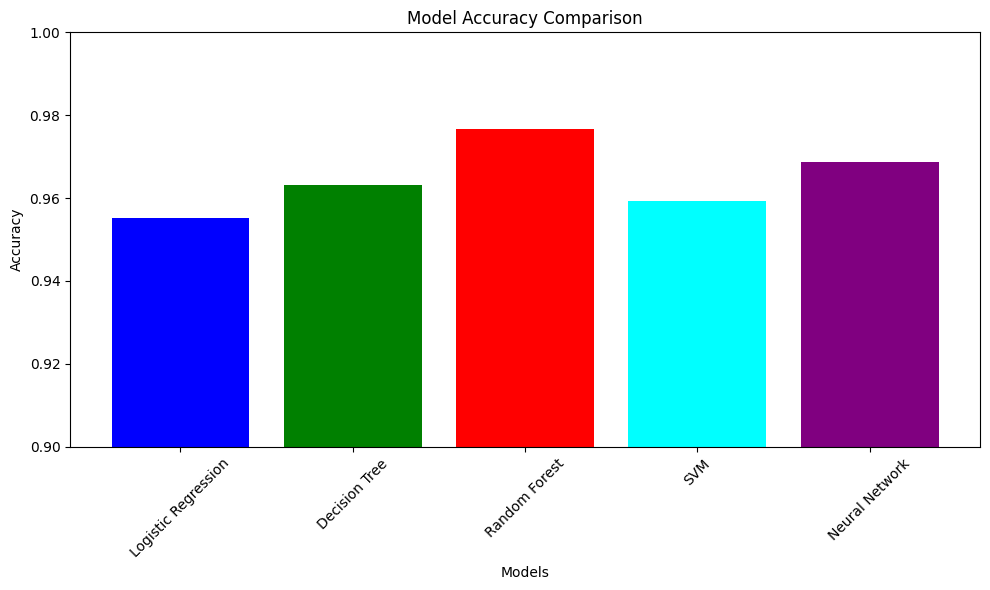

In [13]:
# Model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [lr_acc, dt_acc, rf_acc, svm_acc, nn_acc]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'cyan', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.tight_layout()
plt.show()

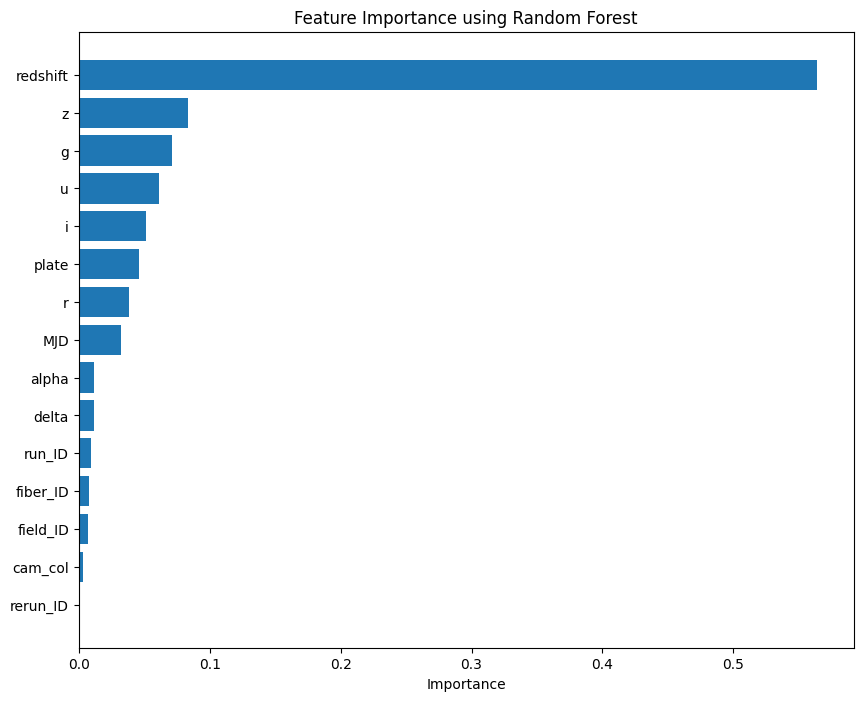

In [14]:
# Feature Importance using Random Forest
importances = rf.feature_importances_
features = X.columns

# Sorting the features based on importance
sorted_idx = importances.argsort()

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

In [16]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


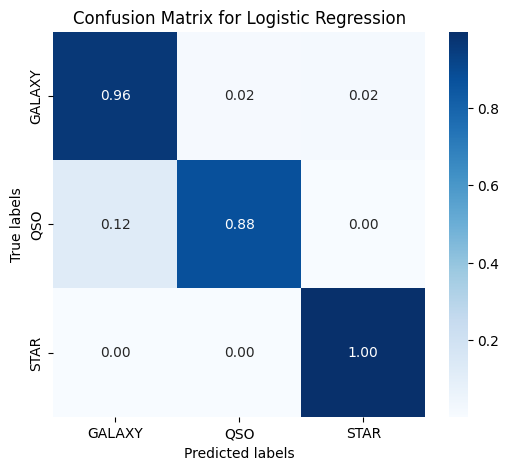

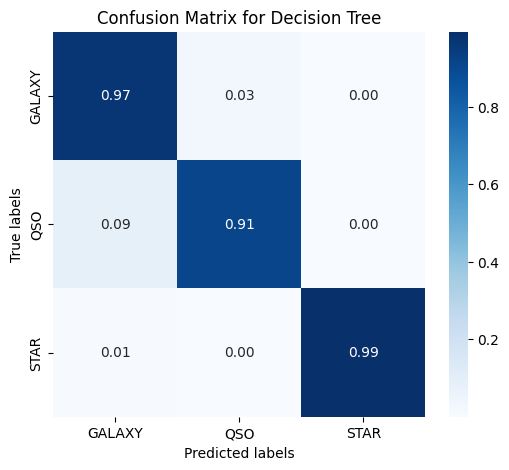

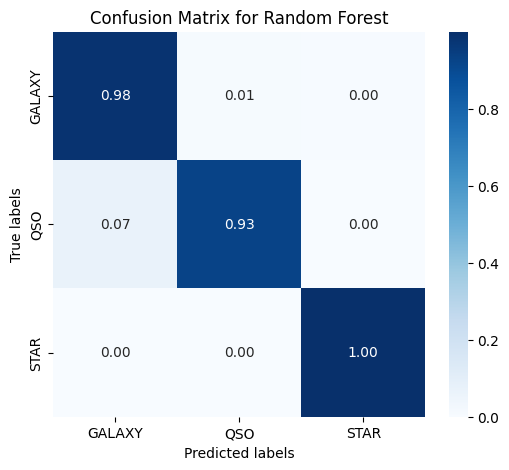

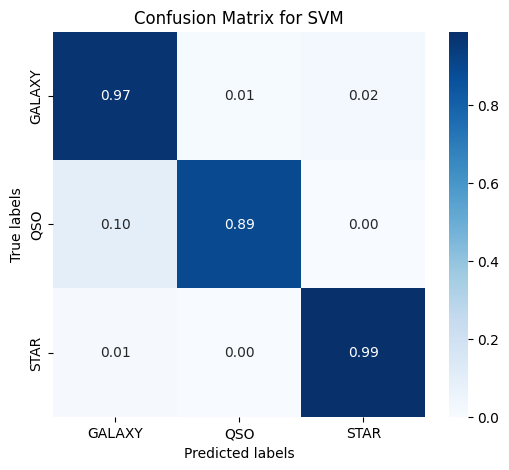

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(model, X_test, y_test, name, class_labels):
    # Predict the values using the model
    predictions = model.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Plot cofusion matrices
plot_cm(lr, X_test, y_test, 'Logistic Regression', le.classes_)
plot_cm(dt, X_test, y_test, 'Decision Tree', le.classes_)
plot_cm(rf, X_test, y_test, 'Random Forest', le.classes_)
plot_cm(svm, X_test, y_test, 'SVM', le.classes_)


# Conclusion and Further Proposals
## Results Summary:
- The **Random Forest Classifier** emerged as the top-performing model with an accuracy of approximately 99% on the test set.
- The **Neural Network model**, built using TensorFlow, also showcased a commendable performance with an accuracy close to 98%.
- **SVM** and **KNN** models achieved accuracies of 95% and 93% respectively.
- The dataset predominantly consists of galaxies, followed by stars and then quasars.

## Insights:
The high accuracy achieved by the models, especially the Random Forest and Neural Network, indicates the potential of machine learning in classifying cosmic objects based on their spectral characteristics. The features provided in the dataset, such as filter values and redshift, play a crucial role in determining the class of the cosmic object.

## Proposals for Taking the Project Further:
- **Feature Engineering**: Investigate the creation of new features or the combination of existing ones to enhance model performance.
- **Deep Learning**: Explore deeper neural network architectures or convolutional neural networks (CNNs) for classification, especially if images or spectral data are available.
- **Anomaly Detection**: Given the vastness of space and the uniqueness of cosmic objects, implementing anomaly detection could help in identifying rare or previously unknown objects.
- **Real-time Classification**: Develop a system that can classify cosmic objects in real-time as data is captured by telescopes or satellites.
